## MODEL TRAINING

1.1 IMPORT DATA AND REQUIRED PACKAGES

In [1]:
# BASIC IMPORT 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# MODELLING
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

IMPORT CSV DATA AS PANDAS DATAFRAME

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.shape

(1000, 8)

PREPARING X AND Y VARIABLES

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in gender variable:       ", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable:       ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education	variable:       ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable:       ", end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course variable:       ", end=" ")
print(df['test_preparation_course'].unique())



Categories in gender variable:        ['female' 'male']
Categories in race_ethnicity variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education	variable:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:        ['standard' 'free/reduced']
Categories in test_preparation_course variable:        ['none' 'completed']


In [8]:
y = df['math_score']

In [9]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [12]:
# create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [17]:
#seprate dataset into tain and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

CREATE AN EVALUTAION FUNCTION TO GIVE ALL METRICS AFTER MODEL TRAINING

In [18]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [20]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "Catboost Regressor" : CatBoostRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor()
    }
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train And Test Dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance For Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Linear Regression
Model Performance For Training Set
- Root Mean Squared Error: 5.3255
- Mean Absolute Error: 4.2685
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4009
- Mean Absolute Error: 4.2184
- R2 Score: 0.8801


Lasso
Model Performance For Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance For Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Performance For Training Set
- Root Mean Squared Error: 5.7093
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

RESULTS

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880127
7,Catboost Regressor,0.851632
5,Random Forest Regressor,0.851488
8,Adaboost Regressor,0.849789
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree Regressor,0.754848


### LINEAR REGRESSION

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of this model is %.2f" %score)

Accuracy of this model is 88.01


### PLOT Y_PRED AND Y_TEST

Text(0, 0.5, 'Predicted')

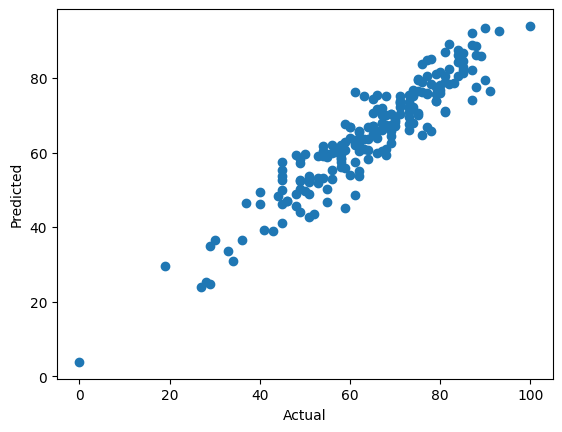

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

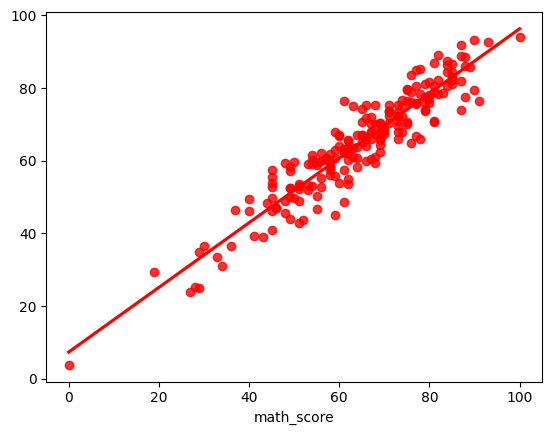

In [28]:
sns.regplot(x=y_test,y=y_pred,color='red',ci=None)

DIFFERENCE BETWEEN ACTUAL AND PREDICTED VALUES

In [38]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df.reset_index(drop=True,inplace=True)

In [39]:
pred_df.head()

,Actual Value,Predicted Value,Difference
0,91,76.513672,14.486328
1,53,58.976562,-5.976562
2,80,76.884766,3.115234
3,74,76.710938,-2.710938
4,84,87.521484,-3.521484
